In [ ]:
## evaluate model performances on clean images

In [ ]:
models_id_list_robust_checkpoints_available = [
    'imagenet_resnet50_advrobust_L2_eps_3.00',
    'Places365_resnet50_advrobust_L2_eps_3.00',
    'imagenet_resnet50_advrobust_L2_eps_1.00',
    'imagenet_resnet50_advrobust_L2_eps_2.00',
    'imagenet_resnet50_advrobust_L2_eps_5.00',
    'imagenetvggface2_resnet50_advrobust_L2_eps_3.00',
    'vggface2_resnet50_advrobust_L2_eps_3.00',
     'vggface2_resnet50_advrobust_L2_eps_1.00',
      'vggface2_resnet50_advrobust_L2_eps_0.50',
      'imagenet_vgg16_advrobust_L2_eps_3.00',
      'vggface2_vgg16_advrobust_L2_eps_3.00',
]

In [3]:
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
path_to_checkpoints = '/home/tahereh/engram/users/Tahereh/Codes/Perceptually_Aligned_Gradients/Training/TrainedModels/train_resnet50_imagenetvggface2_eps_3.00/540a1066-2902-4ed4-9562-53d4fde58440'

log_path = os.path.join(path_to_checkpoints, 'tensorboard', 'events.out.tfevents.1726868901.ax25.rc.zi.columbia.edu')

# Load the event file
event_acc = EventAccumulator(log_path)
event_acc.Reload()

# Get available scalar tags
print(event_acc.Tags()['scalars'])

# Extract scalar values
# for tag in event_acc.Tags()['scalars']:
#     events = event_acc.Scalars(tag)
#     for e in events:
#         print(f"Step: {e.step}, Value: {e.value}")

['adv_train_loss', 'adv_train_top1', 'adv_train_top5', 'nat_val_loss', 'nat_val_top1', 'nat_val_top5', 'adv_val_loss', 'adv_val_top1', 'adv_val_top5']


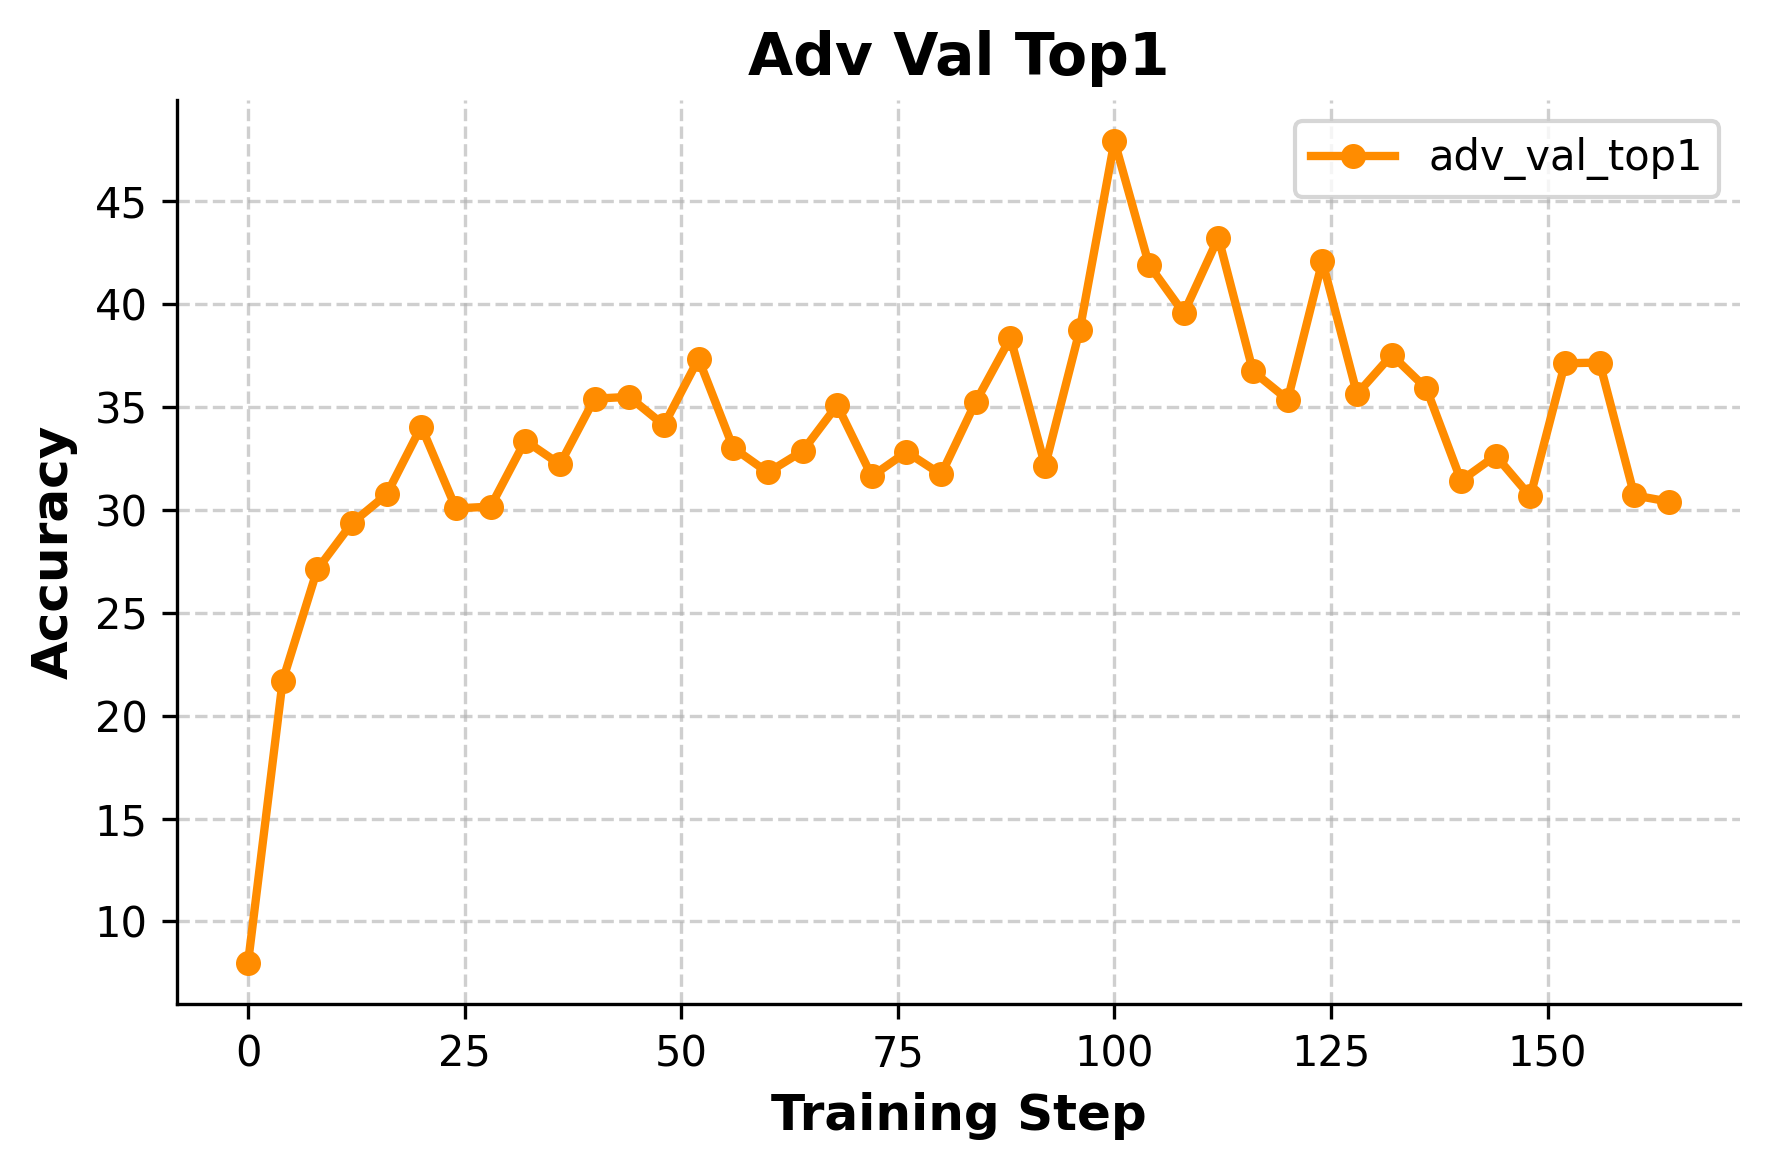

In [4]:
# Choose a scalar tag to plot (e.g., 'adv_train_loss')
selected_tag = 'adv_val_top1'  # Change this to another tag if needed

# Extract scalar values
events = event_acc.Scalars(selected_tag)
steps = np.array([e.step for e in events])
values = np.array([e.value for e in events])

# Create figure for plotting
fig, ax = plt.subplots(figsize=(6, 4), dpi=300)

# Plot the extracted data
ax.plot(steps*2, values, marker='o', linestyle='-', linewidth=2, markersize=5, color='darkorange', label=selected_tag)

# Aesthetics for publication-quality
ax.set_xlabel("Training Step", fontsize=12, fontweight='bold')
ax.set_ylabel("Accuracy", fontsize=12, fontweight='bold')
ax.set_title(f"{selected_tag.replace('_', ' ').title()}", fontsize=14, fontweight='bold')
ax.grid(True, linestyle='--', alpha=0.6)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(fontsize=10, loc="upper right")

# Save the figure (optional)
plt.tight_layout()
plt.show()